# Lab 4 Plotting Weather Data

 * Name: Instructor Notes
 * Course: ENGR114
 * Quarter: Winter 2020
 * Date: 2020-01-29
 * Description: Lab 4 includes a couple different plots of weather data using Matplotlib

## Ensure the .xlsx data file is in the same folder as the running Jupyter notebook

In [1]:
%ls

 Volume in drive D is LEXAR
 Volume Serial Number is 0000-0000

 Directory of D:\ENGR114-2020Q1\week4

01/29/2020  09:42 AM    <DIR>          .
01/29/2020  09:42 AM    <DIR>          ..
01/29/2020  09:44 AM    <DIR>          .ipynb_checkpoints
01/29/2020  11:54 AM            17,855 bond_energy_plot.png
01/29/2020  11:15 AM            57,586 govt_camp_2013_01_to_2016_03.xlsx
02/05/2020  11:57 AM           233,824 Lab4_Plotting_Weather_Data.ipynb
02/05/2020  10:27 AM            24,192 line_plot.png
02/05/2020  10:42 AM            36,791 multi_line_plot.png
01/29/2020  11:54 AM            30,069 plot.png
01/29/2020  11:54 AM            79,482 week4_notes_review_arrays_and_plotting.ipynb
               7 File(s)        479,799 bytes
               3 Dir(s)   1,908,244,480 bytes free


## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import the .xlsx data file into a Pandas dataframe

In [3]:
df = pd.read_excel('govt_camp_2013_01_to_2016_03.xlsx')
df.head()

,STATION,STATION_NAME,DATE,Precipitation (inches),Snow Depth (inches),Snowfall (inches),Max Temp (°F),Min Temp (°F)
0,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130101,0.00,44,0.0,29,12
1,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130102,0.01,42,0.0,27,11
2,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130103,0.00,42,0.0,20,12
3,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130104,0.16,41,0.0,31,14
4,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130105,0.00,41,0.0,37,28


## Clean up the data and save the data to a NumPy array

In [4]:
df.drop(['STATION', 'STATION_NAME'], axis=1, inplace=True)
df.head()

,DATE,Precipitation (inches),Snow Depth (inches),Snowfall (inches),Max Temp (°F),Min Temp (°F)
0,20130101,0.00,44,0.0,29,12
1,20130102,0.01,42,0.0,27,11
2,20130103,0.00,42,0.0,20,12
3,20130104,0.16,41,0.0,31,14
4,20130105,0.00,41,0.0,37,28


In [5]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df.insert(0, 'year', pd.DatetimeIndex(df['DATE']).year)
df.insert(1, 'month', pd.DatetimeIndex(df['DATE']).month)
df.insert(2, 'day', pd.DatetimeIndex(df['DATE']).day)
df.drop(['DATE'], axis=1, inplace=True)
print(df.shape)
df.head()

(1186, 8)


,year,month,day,Precipitation (inches),Snow Depth (inches),Snowfall (inches),Max Temp (°F),Min Temp (°F)
0,2013,1,1,0.00,44,0.0,29,12
1,2013,1,2,0.01,42,0.0,27,11
2,2013,1,3,0.00,42,0.0,20,12
3,2013,1,4,0.16,41,0.0,31,14
4,2013,1,5,0.00,41,0.0,37,28


In [6]:
wd = np.array(df)
print(wd)

[[2.013e+03 1.000e+00 1.000e+00 ... 0.000e+00 2.900e+01 1.200e+01]
 [2.013e+03 1.000e+00 2.000e+00 ... 0.000e+00 2.700e+01 1.100e+01]
 [2.013e+03 1.000e+00 3.000e+00 ... 0.000e+00 2.000e+01 1.200e+01]
 ...
 [2.016e+03 3.000e+00 2.900e+01 ... 0.000e+00 3.300e+01 2.700e+01]
 [2.016e+03 3.000e+00 3.000e+01 ... 0.000e+00 4.700e+01 2.700e+01]
 [2.016e+03 3.000e+00 3.100e+01 ... 0.000e+00 5.900e+01 3.200e+01]]


## Create a line plot

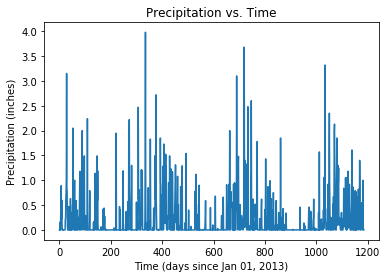

In [7]:
# create data to plot
y = wd[:,3]
x = np.arange(0,len(y),1)

# create fig and ax objects
fig, ax = plt.subplots()

# plot the data on the ax object
ax.plot(x,y)

# customize the plot
ax.set_title('Precipitation vs. Time')
ax.set_ylabel('Precipitation (inches)')
ax.set_xlabel('Time (days since Jan 01, 2013)')

# save the plot to a .png file
fig.savefig('line_plot.png')

# show the plot
plt.show()

## Create a line plot with two lines

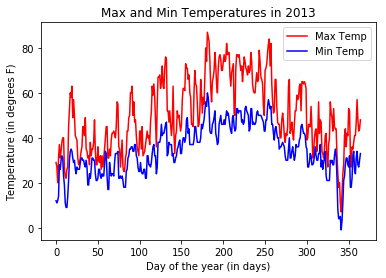

In [8]:
# data
years_array = wd[:,0]
mask_2013 = years_array==2013
max_temps = wd[:,6]
min_temps = wd[:,7]
max_temps2013 = max_temps[mask_2013]
min_temps2013 = min_temps[mask_2013]

# fig, ax objects
fig, ax = plt.subplots()

# plot data on ax object
ax.plot(max_temps2013,'r')
ax.plot(min_temps2013,'b')

# customizations
ax.set_xlabel('Day of the year (in days)')
ax.set_ylabel('Temperature (in degrees F)')
ax.set_title('Max and Min Temperatures in 2013')
ax.legend(['Max Temp','Min Temp'])

# save (optional)
plt.savefig('multi_line_plot.png')

# show the plot
plt.show()

## Create 4 subplots

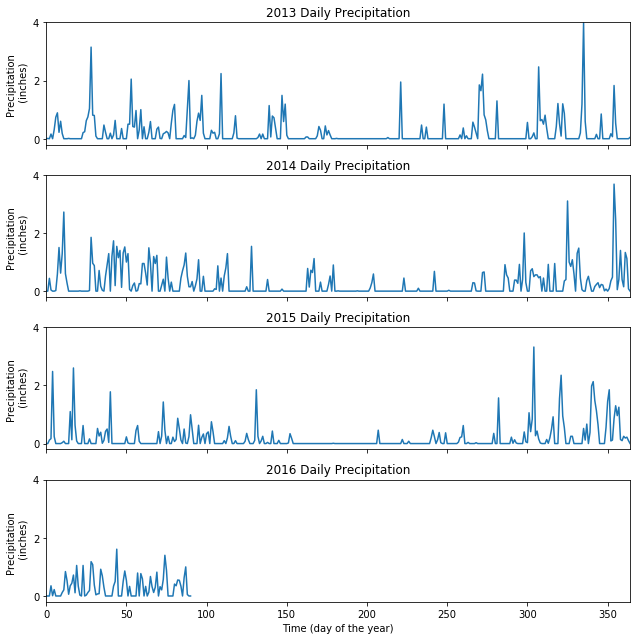

In [9]:
# data
years_array = wd[:,0]
mask_2013 = years_array==2013
mask_2014 = years_array==2014
mask_2015 = years_array==2015
mask_2016 = years_array==2016

precip_array = wd[:,3]
precip_2013 = precip_array[mask_2013]
precip_2014 = precip_array[mask_2014]
precip_2015 = precip_array[mask_2015]
precip_2016 = precip_array[mask_2016]


# fig and ax objects, 4 ax objects one for each subplot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(9,9))

# plot the data on the ax objects
ax1.plot(precip_2013)
ax2.plot(precip_2014)
ax3.plot(precip_2015)
ax4.plot(precip_2016)

# customization
y_range = [-0.2,4]
y_ticks = [0,2,4] 
ax1.set_title('2013 Daily Precipitation')
ax1.set_ylabel('Precipitation \n (inches)')
ax1.set_ylim(y_range)
ax1.set_xlim([0,364])
ax1.set_xticklabels([])
ax1.set_yticks(y_ticks)

ax2.set_title('2014 Daily Precipitation')
ax2.set_ylabel('Precipitation \n (inches)')
ax2.set_ylim(y_range)
ax2.set_xlim([0,364])
ax2.set_xticklabels([])
ax2.set_yticks(y_ticks)

ax3.set_title('2015 Daily Precipitation')
ax3.set_ylabel('Precipitation \n (inches)')
ax3.set_ylim(y_range)
ax3.set_xlim([0,364])
ax3.set_xticklabels([])
ax3.set_yticks(y_ticks)

ax4.set_title('2016 Daily Precipitation')
ax4.set_ylabel('Precipitation \n (inches)')
ax4.set_xlabel('Time (day of the year)')
ax4.set_ylim(y_range)
ax4.set_xlim([0,364])
ax4.set_yticks(y_ticks)

plt.tight_layout()
# save the figure

# show the plots
plt.show()

## y-y plot

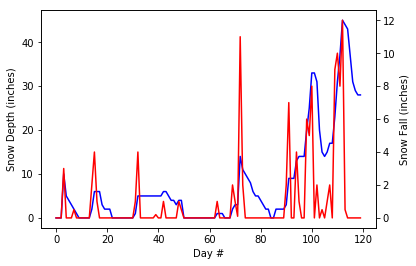

In [10]:
# data
sd_array = wd[:,4]
sf_array = wd[:,5]
years_array = wd[:,0]
months_array = wd[:,1]

years_mask2013 = years_array==2013
years_mask2014 = years_array==2014
nov_dec_mask = months_array>=11 
jan_feb_mask = months_array<=2

nov_dec_2013_mask = np.logical_and(years_mask2013,nov_dec_mask)
jan_feb_2014_mask = np.logical_and(years_mask2014,jan_feb_mask)

nov_dec_jan_feb_mask_years_mask = np.logical_or(nov_dec_2013_mask,jan_feb_2014_mask)

sd_masked = sd_array[nov_dec_jan_feb_mask_years_mask]
sf_masked = sf_array[nov_dec_jan_feb_mask_years_mask]

# fig, ax objects
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot the data on ax objects
ax1.plot(sd_masked,'b')
ax2.plot(sf_masked,'r')

# customize
ax1.set_ylabel('Snow Depth (inches)')
ax1.set_xlabel('Day #')
ax2.set_ylabel('Snow Fall (inches)')

# show the plot
plt.show()

## Histogram

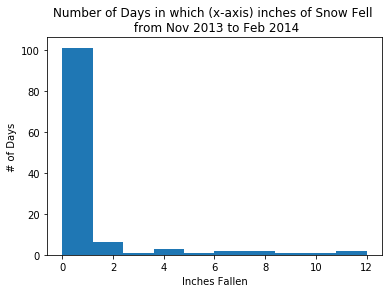

In [11]:
# data
sf_data = sf_masked

# fig, ax
fig, ax = plt.subplots()

# plot the historgram on ax
ax.hist(sf_data,bins=10)

# customize
ax.set_xlabel('Inches Fallen')
ax.set_ylabel('# of Days')
ax.set_title('Number of Days in which (x-axis) inches of Snow Fell \n from Nov 2013 to Feb 2014')
ax

# show the plot
plt.show()